# Compare $K_1$ and $K_2$ among 3 formulations 

Compare formulations from Waters et al. (2014) with those from **a)** Lueker et al. (2000) and **b)** Dickson & Millero (1987)

In [1]:
#install.packages('seacarb', repos="http://ftp.igh.cnrs.fr/pub/CRAN/")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library(seacarb)
library(Hmisc)   #for minor ticks in plot

Loading required package: oce
Loading required package: gsw
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



#### Get updated routines

In [2]:
## Old stuff
#source("/homel/orr/Software/R/seacarb-git/R/updateall.R")
#source("/homel/orr/Software/R/seacarb-git-orr/R/updateall.R")

In [3]:
# Added formulation for K1 & K2 from Dickson & Millero (1987), using k1k2="d87"
# this is for personal use of J. Orr, i.e., not saved in seacarb public repository
#source("/homel/orr/Software/R/seacarb-git/R/K1.R")
#source("/homel/orr/Software/R/seacarb-git/R/K2.R")
source("/homel/orr/Software/R/dm87/K1.R")
source("/homel/orr/Software/R/dm87/K2.R")

## 1. Contour plots of $\Delta \text{p}K_1 = $ and $\Delta \text{p}K_2 = f(T,S)$: 
### Waters et al. (2014) minus Lueker et al. (2000)

Make contour following style of Dickson & Millero (1987, Fig. 1)

#### Array of T, S values

In [4]:
# S <- 35
# T <- 25

# T <- seq(-2, 30., 4) 
# S <- seq(0, 40, 4)

# T <- c(seq(-2, 22, 4), 25, seq(26, 30., 4))
# S <- c(seq(0, 32, 4), 35, seq(36, 40, 4))

  T <- seq(-2, 30, 0.5) 
  S <- seq(0, 40, 0.5)

  Tlen <- length(T)
  Slen <- length(S)

  dat <- expand.grid(S,T)

#### Equilibrium constants

In [5]:
S1=35 ; T1=25; 
P=0
kf="dg" ; ks="k" ; warn='no' ; pHscale='T' ; k1k2="d87"
# Ks (free pH scale) at zero pressure and given pressure
    Ks_P0 <- Ks(S=S1, T=T1, P=0, ks=ks)
    Ks    <- Ks(S=S1, T=T1, P=P, ks=ks)

#### Compute K1 & K2 using Lueker et al. (2000) and Waters et al. (2014) formulations

In [6]:
k1L <- K1(S=dat$Var1, T=dat$Var2, P=0, k1k2="l",   pHscale="T")
k1W <- K1(S=dat$Var1, T=dat$Var2, P=0, k1k2="w14", pHscale="T")

k2L <- K2(S=dat$Var1, T=dat$Var2, P=0, k1k2="l",   pHscale="T")
k2W <- K2(S=dat$Var1, T=dat$Var2, P=0, k1k2="w14", pHscale="T")

# Convert to pK's
pk1L <- -log10(k1L)
pk1W <- -log10(k1W)
dpk1 <- pk1W - pk1L
#dpk1

pk2L <- -log10(k2L)
pk2W <- -log10(k2W)
dpk2 <- pk2W - pk2L
#dpk2

# Following Dickson & Millero (1987)
# 1) compute K = K1/K2 (eliminates H+ from equations) for both Waters and Lueker, then
# 2) take difference pK(waters) - pK(lueker)
pkL <- pk1L - pk2L
pkW <- pk1W - pk2W
dpk <- pkW - pkL
#dpk

Warning message in K1(S = dat$Var1, T = dat$Var2, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K1.”Warning message in K2(S = dat$Var1, T = dat$Var2, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K2.”

#### Plot contour plot

In [7]:
  dim(dpk1) <- c(Slen, Tlen)
  dim(dpk2) <- c(Slen, Tlen)
  dim(dpk) <- c(Slen, Tlen)

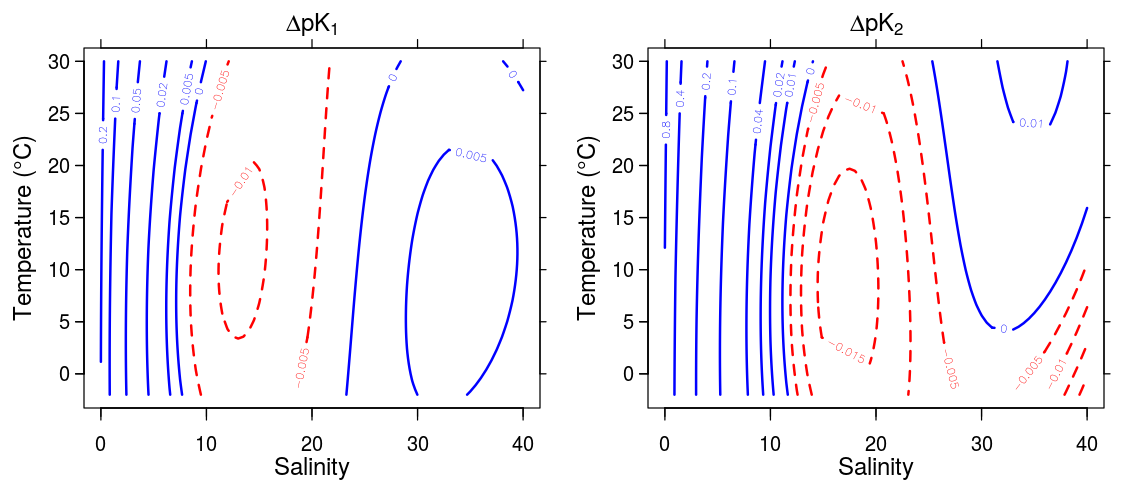

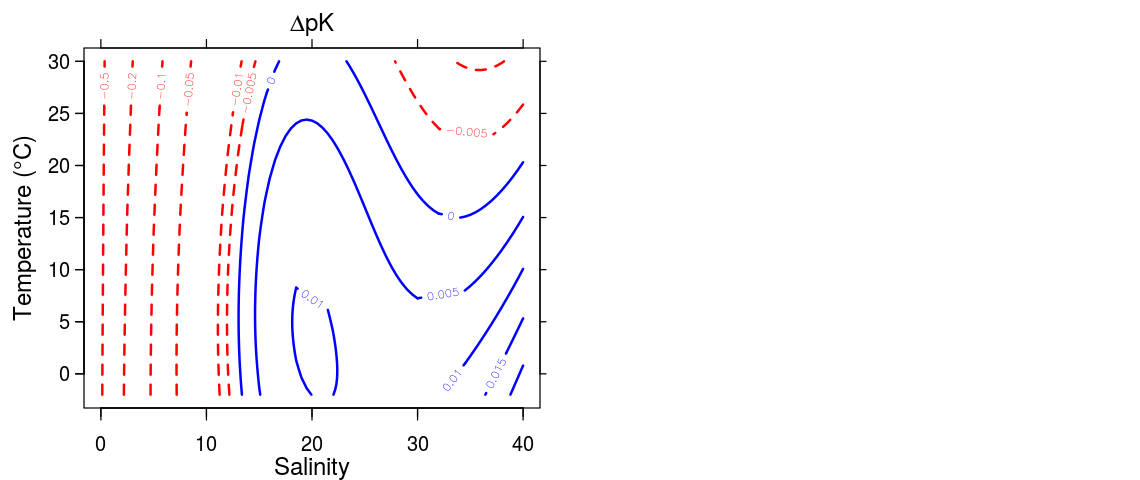

In [8]:
# pdf(file="Fig_ErrContours_trop_socn.pdf")
  options(repr.plot.width=9.5, repr.plot.height=4)

  par(mfrow=c(1,2), mar=c(3,3.5,2,1), oma=c(0,0,0,0.5), mgp=c(2,1,0), font.main=1) 

#  xlabel <- expression(paste("Salinity",sep=""))
#  ylabel <- expression(paste("Temperature")," (",^{o}"C",")",sep=""))

# 1. K1
# -----------------
  big    <- seq(0.10, 0.20,by=0.10)
  mid    <- c(0.05)
  small  <- seq(0.00,0.02, by=0.02)
  smallr <- c(0.005)
  neg    <- seq(-0.02,-0.005, by=0.005)

  subtitle <- expression(paste(Delta,"pK"[1], sep=""))

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature (°C)",   plot.title = title(main = subtitle), 
          levels = big, method="flattest",col="blue",lty=1, lwd=2, cex.lab=1.2, yaxt='n', add=FALSE)
  axis(2, tcl=-0.35, labels=FALSE) 

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature",  
          levels = mid, method="flattest",col="blue",lty=1, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature",  
          levels = small, method="flattest",col="blue",lty=1, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature",  
          levels = smallr, method="flattest",col="blue",lty=1, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature",  
          levels = neg, method="flattest",col="red",lty=2, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  axis(1,labels=FALSE, tcl=-0.35) ; 
  axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
  axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)
  axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)

# 2. K2
# -----------------
  big <- seq(0.4,0.8,by=0.4)
  mid <- seq(0.1,0.2,by=0.1)
  small <- seq(0.00,0.04, by=0.02)
  smallr <- c(0.01)
  neg   <- seq(-0.020,-0.005, by=0.005)


  subtitle <- expression(paste(Delta,"pK"[2], sep=""))

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature (°C)",   plot.title = title(main = subtitle), 
          levels = big, method="flattest",col="blue",lty=1, lwd=2, cex.lab=1.2, yaxt='n', add=FALSE)
  axis(2, tcl=-0.35, labels=FALSE) 

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature",  
          levels = mid, method="flattest",col="blue",lty=1, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature",  
          levels = small, method="flattest",col="blue",lty=1, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature",  
          levels = smallr, method="flattest",col="blue",lty=1, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature",  
          levels = neg, method="flattest",col="red",lty=2, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  axis(1,labels=FALSE, tcl=-0.35) ; 
  axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
  axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)
  axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)

# 3. K
# -----------------
  big       <- seq(0.0,0.02,by=0.005)
  negmax    <- c(-0.5)
  neg       <- seq(-0.2, -0.1, by=0.2)
  negmid    <- seq(-0.1,-0.05, by=0.05)
  negsmall  <- seq(-0.01,-0.01, by=0.01)
  negsmallr <- c(-0.005)


  subtitle <- expression(paste(Delta,"pK", sep=""))

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature (°C)",   plot.title = title(main = subtitle), 
          levels = big, method="flattest",col="blue",lty=1, lwd=2, cex.lab=1.2, yaxt='n', add=FALSE)
  axis(2, tcl=-0.35, labels=FALSE) 

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature",  
          levels = negmid, method="flattest",col="red",lty=2, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature",  
          levels = negsmall, method="flattest",col="red",lty=2, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature",  
          levels = negsmallr, method="flattest",col="red",lty=2, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature",  
          levels = neg, method="flattest",col="red",lty=2, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature",  
          levels = negmax, method="flattest",col="red",lty=2, lwd=2, cex.lab=1.2, yaxt='n', add=TRUE, axes=FALSE)

  axis(1,labels=FALSE, tcl=-0.35) ; 
  axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
  axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)
  axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)

#### Figure: Contour plots showing differences between the Waters et al. (2014) and Lueker et al. (2000) formulations for p$K_1$, p$K_2$, and p$K$, where $K = K_1 / K_2$ (former minus latter).

#### Conclusions
* Large variability with salinity; small variability with temperature
* Thus as expected for changes with salinity at any temperature, the $\Delta$p$K_1$ and $\Delta$p$K_2$ should look much like Fig. 3 in Millero (2010)
* The panel for $\Delta$p$K$ looks very different than that of a constant offset of $\sim$0.03 in Dickson & Millero (1987). The magnitude is much larger here at low salinity. Thus it is not only the individual constants that have a much different value at salinities below 10, but also their ratio $K_1 / K_2$.

#### Perspectives:
* Do the same for Waters - Millero (2010) ?
* Do the same for Lueker - Dickson & Millero (1978) ?

## 2. Line plots of $\Delta \text{p}K_1$ and $\Delta \text{p}K_2$: Waters et al. (2014) minus Lueker et al. (2000)

Make x-y line plots as in Millero (2010, Fig. 3), but over temperature range as well

In [9]:
pk1L_t25 <- -log10(K1(S=S, T=25, P=0, k1k2="l",   pHscale="T"))
pk1W_t25 <- -log10(K1(S=S, T=25, P=0, k1k2="w14", pHscale="T"))
pk2L_t25 <- -log10(K2(S=S, T=25, P=0, k1k2="l",   pHscale="T"))
pk2W_t25 <- -log10(K2(S=S, T=25, P=0, k1k2="w14", pHscale="T"))
dpk1_t25 <- pk1W_t25 - pk1L_t25
dpk2_t25 <- pk2W_t25 - pk2L_t25


pk1L_t1 <- -log10(K1(S=S, T=1, P=0, k1k2="l",   pHscale="T"))
pk1W_t1 <- -log10(K1(S=S, T=1, P=0, k1k2="w14", pHscale="T"))
pk2L_t1 <- -log10(K2(S=S, T=1, P=0, k1k2="l",   pHscale="T"))
pk2W_t1 <- -log10(K2(S=S, T=1, P=0, k1k2="w14", pHscale="T"))
dpk1_t1 <- pk1W_t1 - pk1L_t1
dpk2_t1 <- pk2W_t1 - pk2L_t1

Warning message in K1(S = S, T = 25, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K1.”Warning message in K2(S = S, T = 25, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K2.”Warning message in K1(S = S, T = 1, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K1.”Warning message in K2(S = S, T = 1, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K2.”

In [10]:
pk1L_s35 <- -log10(K1(S=35, T=T, P=0, k1k2="l",   pHscale="T"))
pk1W_s35 <- -log10(K1(S=35, T=T, P=0, k1k2="w14", pHscale="T"))
pk2L_s35 <- -log10(K2(S=35, T=T, P=0, k1k2="l",   pHscale="T"))
pk2W_s35 <- -log10(K2(S=35, T=T, P=0, k1k2="w14", pHscale="T"))
dpk1_s35 <- pk1W_s35 - pk1L_s35
dpk2_s35 <- pk2W_s35 - pk2L_s35


pk1L_s5 <- -log10(K1(S=5, T=T, P=0, k1k2="l",   pHscale="T"))
pk1W_s5 <- -log10(K1(S=5, T=T, P=0, k1k2="w14", pHscale="T"))
pk2L_s5 <- -log10(K2(S=5, T=T, P=0, k1k2="l",   pHscale="T"))
pk2W_s5 <- -log10(K2(S=5, T=T, P=0, k1k2="w14", pHscale="T"))
dpk1_s5 <- pk1W_s5 - pk1L_s5
dpk2_s5 <- pk2W_s5 - pk2L_s5

Warning message in K1(S = 35, T = T, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K1.”Warning message in K2(S = 35, T = T, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K2.”Warning message in K1(S = 5, T = T, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K1.”Warning message in K2(S = 5, T = T, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K2.”

#### Create file 'prettyaxes.R' to beautify subsequent plots (call it in cell below)

In [11]:
cat(' box()\n',
    'axis(1,labels=FALSE, tcl=-0.35) ; axis(1, lwd=0, line=-0.4, labels=TRUE)\n',
    'axis(2,labels=FALSE,tcl=-0.35)  ; axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)\n',
    'axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)\n',
   file='prettyaxes.R')

#### Line plots

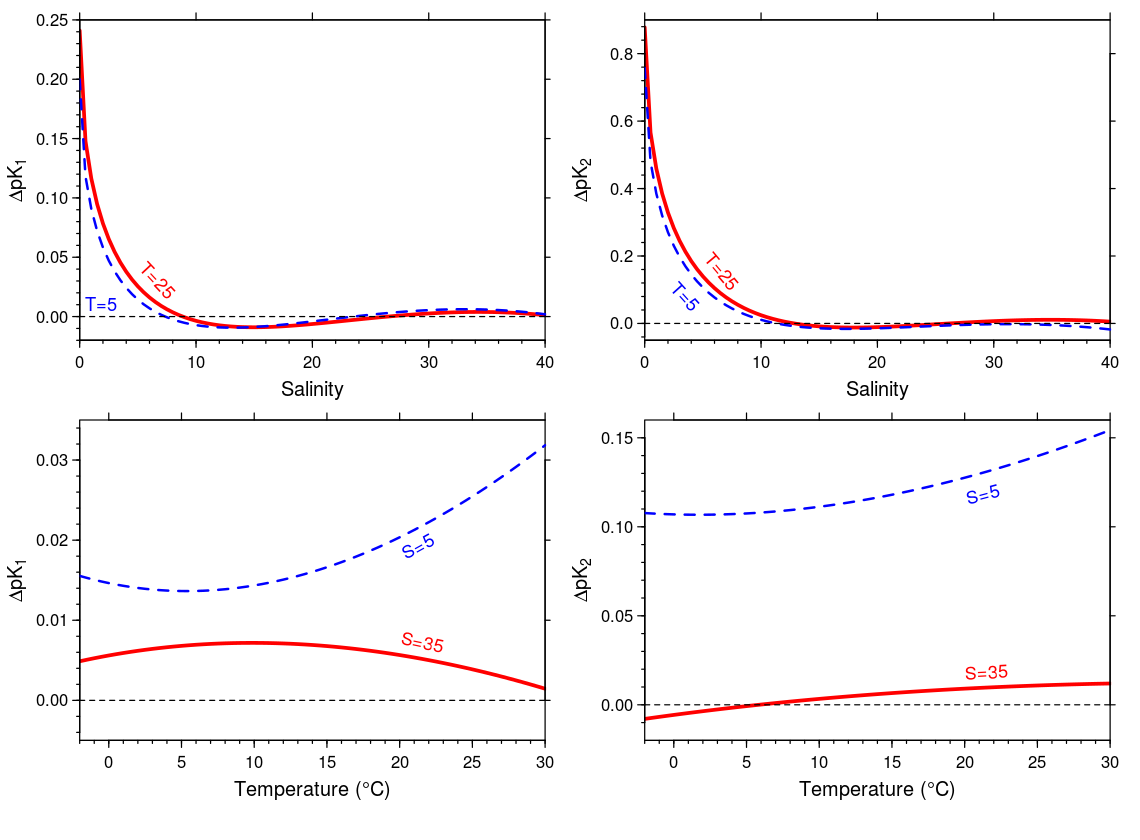

In [12]:
# pdf(file="dpK1K2_waters-lueker.pdf",  width=9.5, height=7.0)
  options(repr.plot.width=9.5, repr.plot.height=7)
 
  par(mfrow=c(2,2), mar=c(3,4,1,1), oma=c(2,0,0,0.5), mgp=c(2,1,0), font.main=1) 

  labk1 <- expression(paste(Delta,"pK"[1], sep=""))
  labk2 <- expression(paste(Delta,"pK"[2], sep=""))

# 1. K1 (varying S, T=25°C & 1°C)
# -------------------------------
  plot(x=S, y=dpk1_t25, type='l', lwd=3, col='red', ylim=c(-0.02,0.25), xlim=c(0,40), main='',
       ylab="", xlab='Salinity', xaxs='i', yaxs='i', cex.lab=1.2, axes=FALSE )
  
# Overide default ylabel to better position it
  title(ylab=labk1, line=2.5, cex.lab=1.2)

# minor.tick(nx=1, ny=1)
  minor.tick(nx=5, ny=5, tick.ratio=0.3)

# Beautify axes (see code in cell above)
  source("prettyaxes.R")

  lines(x=S,y=dpk1_t1, lwd=2, lty=2, col='blue' )
  lines(x=S,y=S*0, lwd=1, lty=2, col='black' )

  text(5, 0.04, 'T=25', adj=c(0.0,0.0), cex=1.1, srt=-47, col='red')
  text(0.5, 0.005, 'T=5',  adj=c(0.0,0.0), cex=1.1, srt=0,   col='blue')

# 2. K2 (varying S, T=25°C & 1°C)
# -------------------------------
  plot(x=S, y=dpk2_t25, type='l', lwd=3, col='red', ylim=c(-0.05,0.90), xlim=c(0,40), main='',
       ylab="", xlab='Salinity', xaxs='i', yaxs='i', cex.lab=1.2, axes=FALSE )
  
# Overide default ylabel to better position it
  title(ylab=labk2, line=2.5, cex.lab=1.2)

# minor.tick(nx=1, ny=1)
  minor.tick(nx=5, ny=5, tick.ratio=0.3)

# Beautify axes (see code in cell above)
  source("prettyaxes.R")

  lines(x=S,y=dpk2_t1, lwd=2, lty=2, col='blue' )
  lines(x=S,y=S*0, lwd=1, lty=2, col='black' )

  text(5, 0.19, 'T=25', adj=c(0.0,0.0), cex=1.1, srt=-50, col='red')
  text(3, 0.13, 'T=5',  adj=c(0.0,1.0), cex=1.1, srt=-48,   col='blue')

# 3. K1 (varying T, S=5 & 35 psu)
# -------------------------------
  plot(x=T, y=dpk1_s35, type='l', lwd=3, col='red', ylim=c(-0.005,0.035), xlim=c(-2,30), main='',
       ylab="", xlab='Temperature (°C)', xaxs='i', yaxs='i', cex.lab=1.2, axes=FALSE )
  
# Overide default ylabel to better position it
  title(ylab=labk1, line=2.5, cex.lab=1.2)

# minor.tick(nx=1, ny=1)
  minor.tick(nx=5, ny=5, tick.ratio=0.3)

# Beautify axes (see code in cell above)
  source("prettyaxes.R")

  lines(x=T,y=dpk1_s5, lwd=2, lty=2, col='blue' )
  lines(x=T,y=T*0, lwd=1, lty=2, col='black' )

  text(20, 0.007, 'S=35', adj=c(0.0,0.0), cex=1.1, srt=-12, col='red')
  text(20, 0.019,  'S=5',  adj=c(0.0,1.0), cex=1.1, srt=29, col='blue')

# 4. K2 (varying T, S=5 & 35 psu)
# -------------------------------
  plot(x=T, y=dpk2_s35, type='l', lwd=3, col='red', ylim=c(-0.02,0.16), xlim=c(-2,30), main='',
       ylab="", xlab='Temperature (°C)', xaxs='i', yaxs='i', cex.lab=1.2, axes=FALSE )
  
# Overide default ylabel to better position it
  title(ylab=labk2, line=2.5, cex.lab=1.2)

# minor.tick(nx=1, ny=1)
  minor.tick(nx=5, ny=5, tick.ratio=0.3)

# Beautify axes (see code in cell above)
  source("prettyaxes.R")

  lines(x=T,y=dpk2_s5, lwd=2, lty=2, col='blue' )
  lines(x=T,y=T*0, lwd=1, lty=2, col='black' )

  text(20, 0.014, 'S=35', adj=c(0.0,0.0), cex=1.1, srt=3, col='red')
  text(20, 0.120, 'S=5',  adj=c(0.0,1.0), cex=1.1, srt=15, col='blue')

# Turn off device driver (to flush output to PDF)
# dev.off()

#### Figure: Differences in p$K_1$ (left) and p$K_2$ (right) between the Waters et al. (2014) and Lueker et al. (2000) formulations (former minus latter) as a function of salinity (top) and temperature (bottom).

#### Conclusion:
* The difference between the Waters et al. and Lueker et al. formulations for $K_1$ and $K_2$ reach extremely high values at low salinities (outside the valid range of the latter, i.e., salinities below 20).
* In the valid salinity range, the two formulations differ by up to 0.007 for $\Delta$p$K_1$ and gnerally within $\pm$0.01 for $\Delta$p$K_2$.
* Need to reflect on next related analysis  (add curves for Millero, 2010?: Response: NO, just refer to Orr et al. (2015) stating conclusion that inconsistencies suggest Millero (2010) should not be used.

## 3. Line plots of $\Delta \text{p}K_1$ and $\Delta \text{p}K_2$: Waters et al. (2014) minus Dickson & Millero (1987)

Make x-y line plots as in Millero (2010, Fig. 3), but over temperature range as well

#### Because Dickson & Millero (1987) is on SWS scale, converting it to T scale requires extra work (via new Kinits function)

In [13]:
Kinits <- function(S=35, T=25, P=0, kf="dg", ks="k", pHscale='T', k1k2="d87", warn='n'){
    n <- max(length(S), length(T))
    if(length(S)!=n){S <- rep(S[1],n)}
    if(length(T)!=n){T <- rep(T[1],n)}
    
    Ks_P0 <- Ks(S=S, T=T, P=0, ks=ks)
    Ks    <- Ks(S=S, T=T, P=P, ks=ks)
    
    # Kf on free pH scale
    Kff_P0 <- Kf(S=S, T=T, P=0, pHscale="F", kf=kf, Ks_P0, Ks)
    Kff    <- Kf(S=S, T=T, P=P, pHscale="F", kf=kf, Ks_P0, Ks)
    # Kf on given pH scale
    Kf <- Kf(S=S, T=T, P=P, pHscale=pHscale, kf=kf, Ks_P0, Ks)

    # Conversion factor from total to SWS pH scale at zero pressure
    ktotal2SWS_P0 <- kconv(S=S,T=T,P=P,kf=kf,Ks=Ks_P0,Kff=Kff_P0)$ktotal2SWS
# ktotal2SWS_P0
    # Conversion factor from SWS to chosen pH scale
    conv <- kconv(S=S, T=T, P=P, kf=kf, Ks=Ks, Kff=Kff, warn=warn)
    kSWS2chosen <- rep(1.,n)
    kSWS2chosen [pHscale == "T"] <- conv$kSWS2total [pHscale == "T"]
    kSWS2chosen [pHscale == "F"] <- conv$kSWS2free [pHscale == "F"]
# kSWS2chosen
    alist <- list("ktotal2SWS_P0"=ktotal2SWS_P0, "kSWS2chosen"=kSWS2chosen)
return(alist) 
}

#### Make arrays of correction factors for proper pH scale conversion in calls to $K_1$ and $K_2$ (using Kinits function)

In [14]:
st25 <- Kinits(S,    T=25)
st1  <- Kinits(S,    T=1)
s35t <- Kinits(S=35, T)
s5t  <- Kinits(S=5,  T)

Warning message in Ks(S = S, T = T, P = 0, ks = ks):
“S and/or T is outside the range of validity of the formulation chosen for Ks.”Warning message in Ks(S = S, T = T, P = 0, ks = ks):
“S and/or T is outside the range of validity of the formulations available for Ks in seacarb.”Warning message in Ks(S = S, T = T, P = P, ks = ks):
“S and/or T is outside the range of validity of the formulation chosen for Ks.”Warning message in Ks(S = S, T = T, P = P, ks = ks):
“S and/or T is outside the range of validity of the formulations available for Ks in seacarb.”Warning message in Ks(S = S, T = T, P = 0, ks = ks):
“S and/or T is outside the range of validity of the formulation chosen for Ks.”Warning message in Ks(S = S, T = T, P = 0, ks = ks):
“S and/or T is outside the range of validity of the formulations available for Ks in seacarb.”Warning message in Ks(S = S, T = T, P = P, ks = ks):
“S and/or T is outside the range of validity of the formulation chosen for Ks.”Warning message in Ks(S = S, T 

In [15]:
pk1D_t25 <- -log10(K1(S=S, T=25, P=0, k1k2="d87", pHscale="T", kSWS2scale=st25$kSWS2chosen, ktotal2SWS_P0=st25$ktotal2SWS_P0))
pk1W_t25 <- -log10(K1(S=S, T=25, P=0, k1k2="w14", pHscale="T"))
pk2D_t25 <- -log10(K2(S=S, T=25, P=0, k1k2="d87", pHscale="T", kSWS2scale=st25$kSWS2chosen, ktotal2SWS_P0=st25$ktotal2SWS_P0))
pk2W_t25 <- -log10(K2(S=S, T=25, P=0, k1k2="w14", pHscale="T"))
dpk1_t25 <- pk1W_t25 - pk1D_t25
dpk2_t25 <- pk2W_t25 - pk2D_t25


pk1D_t1 <- -log10(K1(S=S, T=1, P=0, k1k2="d87", pHscale="T", kSWS2scale=st1$kSWS2chosen, ktotal2SWS_P0=st1$ktotal2SWS_P0))
pk1W_t1 <- -log10(K1(S=S, T=1, P=0, k1k2="w14", pHscale="T"))
pk2D_t1 <- -log10(K2(S=S, T=1, P=0, k1k2="d87", pHscale="T", kSWS2scale=st1$kSWS2chosen, ktotal2SWS_P0=st1$ktotal2SWS_P0))
pk2W_t1 <- -log10(K2(S=S, T=1, P=0, k1k2="w14", pHscale="T"))
dpk1_t1 <- pk1W_t1 - pk1D_t1
dpk2_t1 <- pk2W_t1 - pk2D_t1

In [16]:
pk1D_s35 <- -log10(K1(S=35, T=T, P=0, k1k2="d87", pHscale="T", kSWS2scale=s35t$kSWS2chosen, ktotal2SWS_P0=s35t$ktotal2SWS_P0))
pk1W_s35 <- -log10(K1(S=35, T=T, P=0, k1k2="w14", pHscale="T"))
pk2D_s35 <- -log10(K2(S=35, T=T, P=0, k1k2="d87", pHscale="T", kSWS2scale=s35t$kSWS2chosen, ktotal2SWS_P0=s35t$ktotal2SWS_P0))
pk2W_s35 <- -log10(K2(S=35, T=T, P=0, k1k2="w14", pHscale="T"))
dpk1_s35 <- pk1W_s35 - pk1D_s35
dpk2_s35 <- pk2W_s35 - pk2D_s35


pk1D_s5 <- -log10(K1(S=5, T=T, P=0, k1k2="d87", pHscale="T", kSWS2scale=s5t$kSWS2chosen, ktotal2SWS_P0=s5t$ktotal2SWS_P0))
pk1W_s5 <- -log10(K1(S=5, T=T, P=0, k1k2="w14", pHscale="T"))
pk2D_s5 <- -log10(K2(S=5, T=T, P=0, k1k2="d87", pHscale="T", kSWS2scale=s5t$kSWS2chosen, ktotal2SWS_P0=s5t$ktotal2SWS_P0))
pk2W_s5 <- -log10(K2(S=5, T=T, P=0, k1k2="w14", pHscale="T"))
dpk1_s5 <- pk1W_s5 - pk1D_s5
dpk2_s5 <- pk2W_s5 - pk2D_s5

#### Some summary statistics

In [17]:
#dpk1_t25
#summary(dpk1_t25)
#sapply(dpk1_t25, mean, na.rm=TRUE)
#sd(dpk1_s35, na.rm=TRUE)

#### Line plots

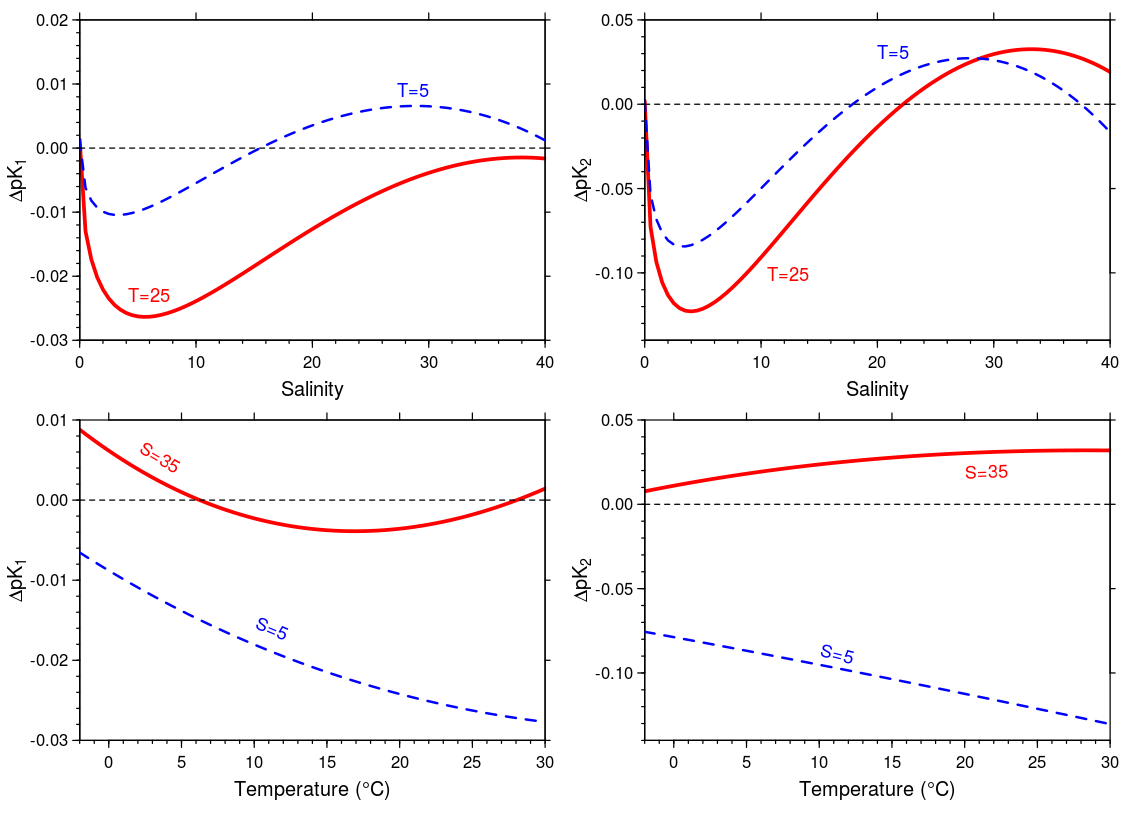

In [18]:
# pdf(file="dpK1K2_waters-dm87.pdf",  width=9.5, height=7.0)
  options(repr.plot.width=9.5, repr.plot.height=7)
 
  par(mfrow=c(2,2), mar=c(3,4,1,1), oma=c(2,0,0,0.5), mgp=c(2,1,0), font.main=1) 
 
  labk1 <- expression(paste(Delta,"pK"[1], sep=""))
  labk2 <- expression(paste(Delta,"pK"[2], sep=""))

# 1. K1 (varying S, T=25°C & 1°C)
# -------------------------------
  plot(x=S, y=dpk1_t25, type='l', lwd=3, col='red', ylim=c(-0.03,0.02), xlim=c(0,40), main='',
       ylab="", xlab='Salinity', xaxs='i', yaxs='i', cex.lab=1.2, axes=FALSE )
  
# Overide default ylabel to better position it
  title(ylab=labk1, line=2.5, cex.lab=1.2)

# minor.tick(nx=1, ny=1)
  minor.tick(nx=5, ny=5, tick.ratio=0.3)

# Beautify axes (see code in cell above)
  source("prettyaxes.R")

  lines(x=S,y=dpk1_t1, lwd=2, lty=2, col='blue' )
  lines(x=S,y=S*0, lwd=1, lty=2, col='black' )

  text( 6, -0.024, 'T=25', adj=c(0.5,0.0), cex=1.1, srt=0,  col='red')
  text(30,  0.008, 'T=5',  adj=c(1.0,0.0), cex=1.1, srt=0,  col='blue')

# 2. K2 (varying S, T=25°C & 1°C)
# -------------------------------
  plot(x=S, y=dpk2_t25, type='l', lwd=3, col='red', ylim=c(-0.14,0.05), xlim=c(0,40), main='',
       ylab="", xlab='Salinity', xaxs='i', yaxs='i', cex.lab=1.2, axes=FALSE )
  
# Overide default ylabel to better position it
  title(ylab=labk2, line=2.5, cex.lab=1.2)

# minor.tick(nx=1, ny=1)
  minor.tick(nx=5, ny=5, tick.ratio=0.3)

# Beautify axes (see code in cell above)
  source("prettyaxes.R")

  lines(x=S, y=dpk2_t1, lwd=2, lty=2, col='blue' )
  lines(x=S, y=S*0,     lwd=1, lty=2, col='black' )

  text(10.5, -0.105, 'T=25', adj=c(0.0,0.0), cex=1.1, srt=0, col='red')
  text(20, 0.027, 'T=5',  adj=c(0.0,0.0), cex=1.1, srt=0, col='blue')

# 3. K1 (varying T, S=5 & 35 psu)
# -------------------------------
  plot(x=T, y=dpk1_s35, type='l', lwd=3, col='red', ylim=c(-0.03,0.01), xlim=c(-2,30), main='',
       ylab="", xlab='Temperature (°C)', xaxs='i', yaxs='i', cex.lab=1.2, axes=FALSE )
  # Overide default ylabel to better position it
  title(ylab=labk1, line=2.5, cex.lab=1.2)

# minor.tick(nx=1, ny=1)
  minor.tick(nx=5, ny=5, tick.ratio=0.3)

# Beautify axes (see code in cell above)
  source("prettyaxes.R")

  lines(x=T,y=dpk1_s5, lwd=2, lty=2, col='blue' )
  lines(x=T,y=T*0, lwd=1, lty=2, col='black' )

  text(2,   0.006, 'S=35', adj=c(0.0,0.0), cex=1.1, srt=-30, col='red')
  text(10, -0.016,  'S=5',  adj=c(0.0,0.0), cex=1.1, srt=-23, col='blue')

# 4. K2 (varying T, S=5 & 35 psu)
# -------------------------------
  plot(x=T, y=dpk2_s35, type='l', lwd=3, col='red', ylim=c(-0.14,0.05), xlim=c(-2,30), main='',
       ylab="", xlab='Temperature (°C)', xaxs='i', yaxs='i', cex.lab=1.2, axes=FALSE )
  
# Overide default ylabel to better position it
  title(ylab=labk2, line=2.5, cex.lab=1.2)

# minor.tick(nx=1, ny=1)
  minor.tick(nx=5, ny=5, tick.ratio=0.3)

# Beautify axes (see code in cell above)
  source("prettyaxes.R")

  lines(x=T,y=dpk2_s5, lwd=2, lty=2, col='blue' )
  lines(x=T,y=T*0, lwd=1, lty=2, col='black' )

  text(20, 0.015, 'S=35', adj=c(0.0,0.0), cex=1.1, srt=2, col='red')
  text(10, -0.09, 'S=5',  adj=c(0.0,0.0), cex=1.1, srt=-14, col='blue')

# Turn off device driver (to flush output to PDF)
# dev.off()

#### Figure: Differences in p$K_1$ (left) and p$K_2$ (right) between the Waters et al. (2014) and Dickson and Millero (1987) formulations (former minus latter) as a function of salinity (top) and temperature (bottom).

#### Conclusion:
* The difference between the Waters et al. (2014) and Dickson & Millero (1987) formulations for $K_1$ and $K_2$ reaches up to -0.025 and -0.12, respectively.
* For salinities above 20, differences between the two formulations are smaller, but still reach values of around $\pm$0.01 for $\Delta$p$K_1$ and  $\pm$0.03 for $\Delta$p$K_2$.

## 4. Contour plots of $\Delta \text{p}K_1$, $\Delta \text{p}K_2$,  $\Delta \text{p}K = f(T,S)$: 
### Waters et al. (2014) minus Lueker et al. (2000)

#### Make contour following style of Dickson & Millero (1987, Fig. 1)

In [19]:
k1L <- K1(S=dat$Var1, T=dat$Var2, P=0, k1k2="l",   pHscale="T")
k1W <- K1(S=dat$Var1, T=dat$Var2, P=0, k1k2="w14", pHscale="T")

k2L <- K2(S=dat$Var1, T=dat$Var2, P=0, k1k2="l",   pHscale="T")
k2W <- K2(S=dat$Var1, T=dat$Var2, P=0, k1k2="w14", pHscale="T")

# Convert to pK's
pk1L <- -log10(k1L)
pk1W <- -log10(k1W)
dpk1 <- pk1W - pk1L
#dpk1

pk2L <- -log10(k2L)
pk2W <- -log10(k2W)
dpk2 <- pk2W - pk2L
#dpk2

# Following Dickson & Millero (1987)
# 1) compute K = K1/K2 (eliminates H+ from equations) for both Waters and Lueker, then
# 2) take difference pK(waters) - pK(lueker)
pkL <- pk1L - pk2L
pkW <- pk1W - pk2W
dpk <- pkW - pkL
#dpk

Warning message in K1(S = dat$Var1, T = dat$Var2, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K1.”Warning message in K2(S = dat$Var1, T = dat$Var2, P = 0, k1k2 = "l", pHscale = "T"):
“S and/or T is outside the range of validity of the formulation chosen for K2.”

In [20]:
st <- Kinits(S=dat$Var1, T=dat$Var2)

k1D <- K1(S=dat$Var1, T=dat$Var2, P=0, k1k2="d87", pHscale="T", kSWS2scale=st$kSWS2chosen, ktotal2SWS_P0=st$ktotal2SWS_P0)
k2D <- K2(S=dat$Var1, T=dat$Var2, P=0, k1k2="d87", pHscale="T", kSWS2scale=st$kSWS2chosen, ktotal2SWS_P0=st$ktotal2SWS_P0)

# Convert to pK's
pk1D <- -log10(k1D)
pk2D <- -log10(k2D)

# Compute pK of ratio (K=K1/K2)
pkD <- pk1D - pk2D

# Take differences: Waters et al. (2014) minus Dickson & Millero (1987)
dpk1WD <- pk1W - pk1D
dpk2WD <- pk2W - pk2D
dpkWD <- pkW - pkD

Warning message in Ks(S = S, T = T, P = 0, ks = ks):
“S and/or T is outside the range of validity of the formulation chosen for Ks.”Warning message in Ks(S = S, T = T, P = 0, ks = ks):
“S and/or T is outside the range of validity of the formulations available for Ks in seacarb.”Warning message in Ks(S = S, T = T, P = P, ks = ks):
“S and/or T is outside the range of validity of the formulation chosen for Ks.”Warning message in Ks(S = S, T = T, P = P, ks = ks):
“S and/or T is outside the range of validity of the formulations available for Ks in seacarb.”

#### Structure arrays for contour plots

In [21]:
  dim(dpk1) <- c(Slen, Tlen)
  dim(dpk2) <- c(Slen, Tlen)
  dim(dpk)  <- c(Slen, Tlen)

  dim(dpk1WD) <- c(Slen, Tlen)
  dim(dpk2WD) <- c(Slen, Tlen)
  dim(dpkWD)  <- c(Slen, Tlen)

#### Contour plots

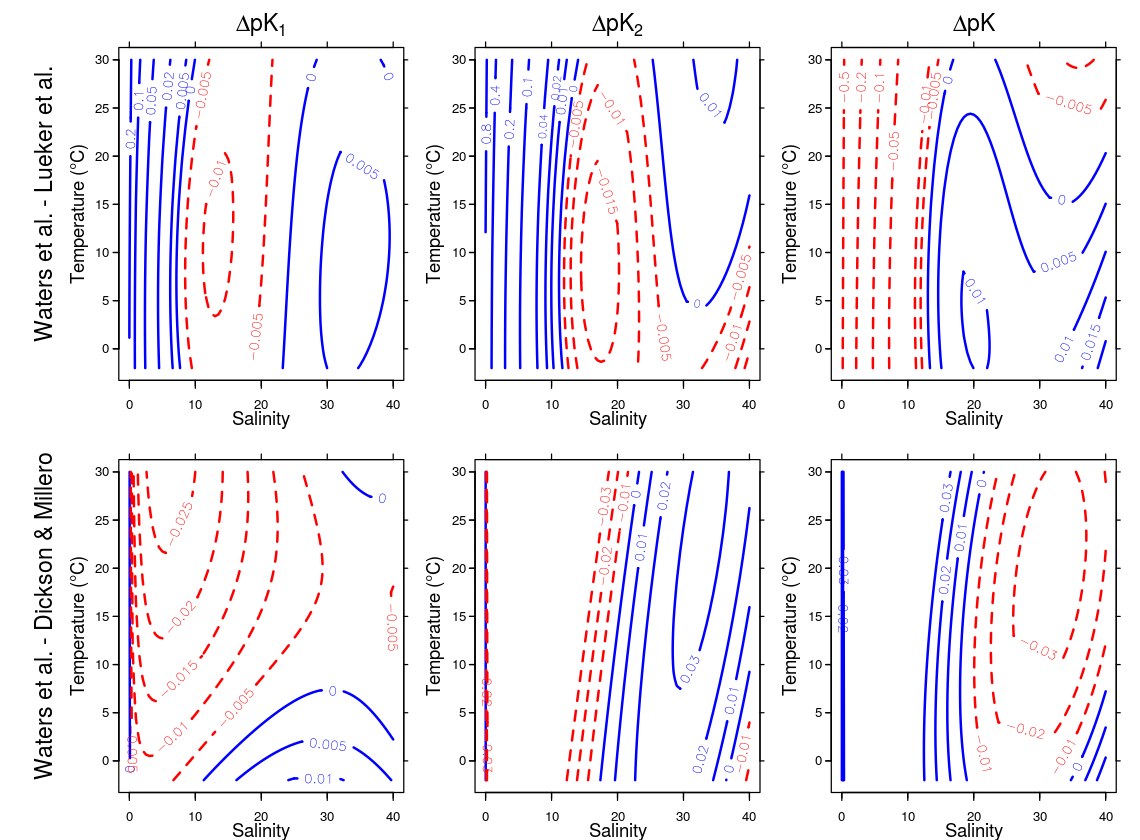

In [22]:
# pdf(file="cont_dpK1K2K_w14-l00-dm87.pdf",  width=9.5, height=7.0)
  options(repr.plot.width=9.5, repr.plot.height=7)

  par(mfrow=c(2,3), mar=c(3,3.5,2,1), oma=c(0,4,1,0.5), mgp=c(2,1,0), font.main=1) 

#  xlabel <- expression(paste("Salinity",sep=""))
#  ylabel <- expression(paste("Temperature")," (",^{o}"C",")",sep=""))

# 1. K1 difference: Waters et al. (2014) minus Lueker et al. (2000)
# ----------------------------------------------------------------------
  big    <- seq(0.10, 0.20,by=0.10)
  mid    <- c(0.05)
  small  <- seq(0.00,0.02, by=0.02)
  smallr <- c(0.005)
  neg    <- seq(-0.02,-0.005, by=0.005)

  subtitle <- expression(paste(Delta,"pK"[1], sep=""))

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature (°C)", levels = big, method="flattest", 
          col="blue", lty=1, lwd=2, cex.lab=1.4, cex.main=1.8, labcex=0.7, yaxt='n', add=FALSE)
# title(main = subtitle, cex.main=1.6)
  axis(2, tcl=-0.35, labels=FALSE) 

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature", levels = mid, method="flattest",
          col="blue", lty=1, lwd=2, cex.lab=1.4, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature", levels = small, method="flattest",
          col="blue", lty=1, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature", levels = smallr, method="flattest", 
          col="blue", lty=1, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk1,  xlab="Salinity", ylab="Temperature", levels = neg, method="flattest", 
          col="red", lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  axis(1,labels=FALSE, tcl=-0.35) ; 
  axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
  axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)
  axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)

  mtext(subtitle, side=3, line=0.5, at=20, cex=1.15)
  mtext("Waters et al. - Lueker et al.", side=2, line=4, at=15, srt=90, cex=1.15)

# 2. K2 difference: Waters et al. (2014) minus Lueker et al. (2000)
# ----------------------------------------------------------------------
  big <- seq(0.4,0.8,by=0.4)
  mid <- seq(0.1,0.2,by=0.1)
  small <- seq(0.00,0.04, by=0.02)
  smallr <- c(0.01)
  neg   <- seq(-0.020,-0.005, by=0.005)

  subtitle <- expression(paste(Delta,"pK"[2], sep=""))

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature (°C)", levels = big, method="flattest", 
          col="blue",lty=1, lwd=2, cex.lab=1.4, labcex=0.7, yaxt='n', add=FALSE)
  axis(2, tcl=-0.35, labels=FALSE) 

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature", levels = mid, method="flattest",
          col="blue", lty=1, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature", levels = small, method="flattest",
          col="blue", lty=1, lwd=2, clabcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature", levels = smallr, method="flattest",
          col="blue", lty=1, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk2,  xlab="Salinity", ylab="Temperature", levels = neg, method="flattest", 
          col="red", lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  axis(1,labels=FALSE, tcl=-0.35) ; 
  axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
  axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)
  axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)

  mtext(subtitle, side=3, line=0.5, at=20, cex=1.15)

# 3. K difference: Waters et al. (2014) minus Lueker et al. (2000)
# ----------------------------------------------------------------------
  big       <- seq(0.0,0.02,by=0.005)
  negmax    <- c(-0.5)
  neg       <- seq(-0.2, -0.1, by=0.2)
  negmid    <- seq(-0.1,-0.05, by=0.05)
  negsmall  <- seq(-0.01,-0.01, by=0.01)
  negsmallr <- c(-0.005)


  subtitle <- expression(paste(Delta,"pK", sep=""))

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature (°C)", levels = big, method="flattest",
          col="blue",lty=1, lwd=2, cex.lab=1.4, labcex=0.7, yaxt='n', add=FALSE)
  axis(2, tcl=-0.35, labels=FALSE) 

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature", levels = negmid, method="flattest",
          col="red",lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature", levels = negsmall, method="flattest",
          col="red",lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature", levels = negsmallr, method="flattest",
          col="red",lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature", levels = neg, method="flattest",
          col="red",lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  contour(S, T , dpk,  xlab="Salinity", ylab="Temperature", levels = negmax, method="flattest",
          col="red",lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  axis(1,labels=FALSE, tcl=-0.35) ; 
  axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
  axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)
  axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)

  mtext(subtitle, side=3, line=0.5, at=20, cex=1.15)

# 4. K1 difference: Waters et al. (2014) minus Dickson & Millero (1987)
# ----------------------------------------------------------------------
  big    <- seq(0.00, 0.01,by=0.005)
  neg    <- seq(-0.03,-0.005, by=0.005)

  subtitle <- expression(paste(Delta,"pK"[1], sep=""))
  subtitle <- c(' ')

  contour(S, T , dpk1WD,  xlab="Salinity", ylab="Temperature (°C)", levels = big, method="flattest",
          col="blue",lty=1, lwd=2, cex.lab=1.4, labcex=0.7, yaxt='n', add=FALSE)
  title(main = subtitle, cex.main=1.6)
  axis(2, tcl=-0.35, labels=FALSE) 

  contour(S, T , dpk1WD,  xlab="Salinity", ylab="Temperature", levels = neg, method="flattest",
          col="red",lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  axis(1,labels=FALSE, tcl=-0.35) ; 
  axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
  axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)
  axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)

  mtext("Waters et al. - Dickson & Millero", side=2, line=4, at=15, srt=90, cex=1.15)

# 5. K2 difference: Waters et al. (2014) minus Dickson & Millero (1987)
# ----------------------------------------------------------------------
  big <- seq(0.00, 0.03,by=0.01)
  neg   <- seq(-0.03,-0.01, by=0.01)

  subtitle <- expression(paste(Delta,"pK"[2], sep=""))
  subtitle <- c(' ')

  contour(S, T , dpk2WD,  xlab="Salinity", ylab="Temperature (°C)", levels = big, method="flattest", 
          col="blue",lty=1, lwd=2, cex.lab=1.4, labcex=0.7, yaxt='n', add=FALSE)
  title(main = subtitle, cex.main=1.6)
  axis(2, tcl=-0.35, labels=FALSE) 

  contour(S, T , dpk2WD,  xlab="Salinity", ylab="Temperature", levels = neg, method="flattest",
          col="red",lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  axis(1,labels=FALSE, tcl=-0.35) ; 
  axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
  axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)
  axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)

# 6. K difference: Waters et al. (2014) minus Dickson & Millero (1987)
# ----------------------------------------------------------------------
  big       <- seq( 0.00,  0.03, by=0.01)
  neg  <- seq(-0.03, -0.01, by=0.01)


  subtitle <- expression(paste(Delta,"pK", sep=""))
  subtitle <- c(' ')

  contour(S, T , dpkWD,  xlab="Salinity", ylab="Temperature (°C)", levels = big, method="flattest",
          col="blue",lty=1, lwd=2, cex.lab=1.4, labcex=0.7, yaxt='n', add=FALSE)
  title(main = subtitle, cex.main=1.6)
  axis(2, tcl=-0.35, labels=FALSE) 

  contour(S, T , dpkWD,  xlab="Salinity", ylab="Temperature", levels = neg, method="flattest",
          col="red",lty=2, lwd=2, labcex=0.7, yaxt='n', add=TRUE, axes=FALSE)

  axis(1,labels=FALSE, tcl=-0.35) ; 
  axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
  axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)
  axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)

# Turn off device driver (to flush output to PDF)
# dev.off()

#### Figure: Contour plots showing systematic differences between formulations for (left) p$K_1$, (middle) p$K_2$, and (right) p$K$, where $K = K_1 / K_2$: (top row) Waters et al. (2014) minus Lueker et al. (2000) formulations and (bottom row) Waters et al. (2014) minus Dickson  and Millero (1987) formulations. In the bottom row, contour lilnes coverge towards zero difference near $S = 0$ from the largest differences located around $S = 5$. 

#### Conclusions
* *Top row:* Waters et al. (2014) minus Lueker et al. (2000) 
  -  Large variability with salinity; small variability with temperature  
  - Thus as expected for changes with salinity at any temperature, the $\Delta$p$K_1$ and $\Delta$p$K_2$ should look much like Fig. 3 in Millero (2010)
  - The panel for $\Delta$p$K$ looks very different than that of a constant offset of $\sim$0.03 in Dickson & Millero (1987). The magnitude is much larger here at low salinity. Thus it is not only the individual constants that have a much different value at salinities below 10, but also their ratio $K_1 / K_2$.

* *Bottom row:* Waters et al. (2014) minus Dickson  and Millero (1987)
  - Variability from $T$ nearly as large as variability from $S$ 
  - $K_1$: $\pm$0.007 for $S > 20$ ; $\pm$0.01 for $S < 20$
  - $K_2$: up to 0.03 ($\pm$0.15)  for $S > 20$ ; $\pm$0.03 across all salinties
  - $K$:   $\pm$0.03 across all salinties